Dataset Shape: (887, 8)

Data Types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


/tmp/ipython-input-1031667424.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


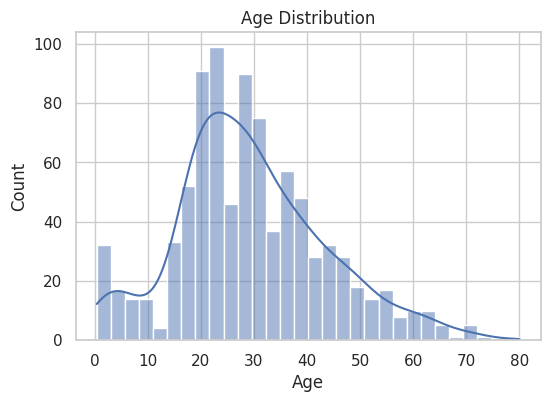

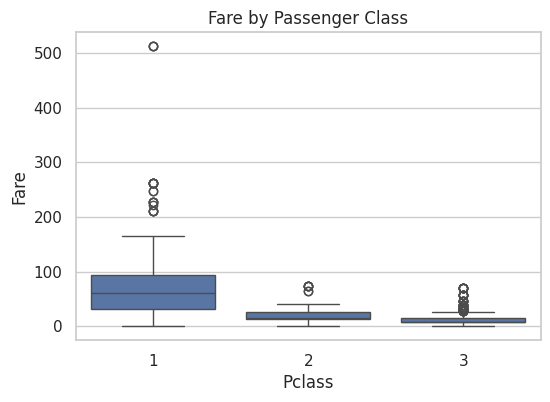

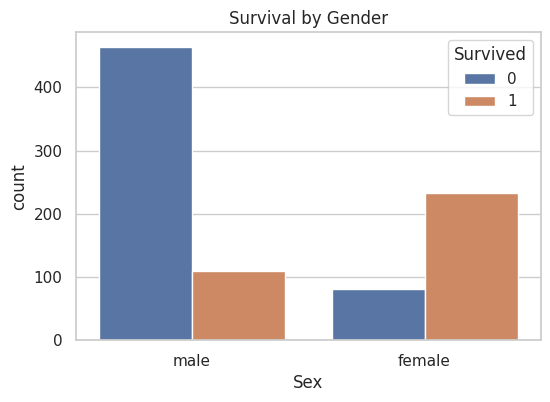

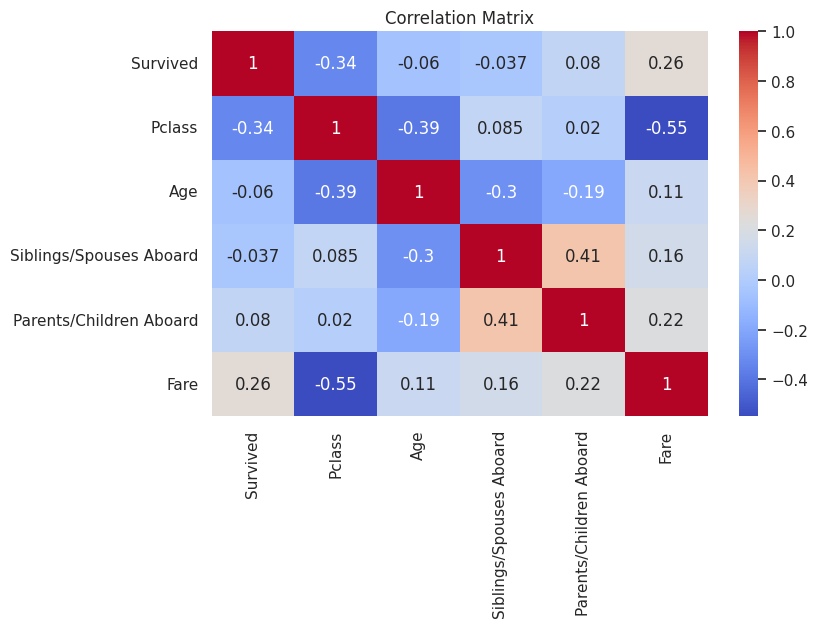

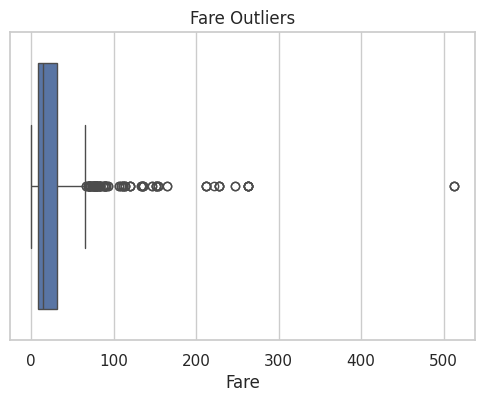

Number of Fare Outliers: 20


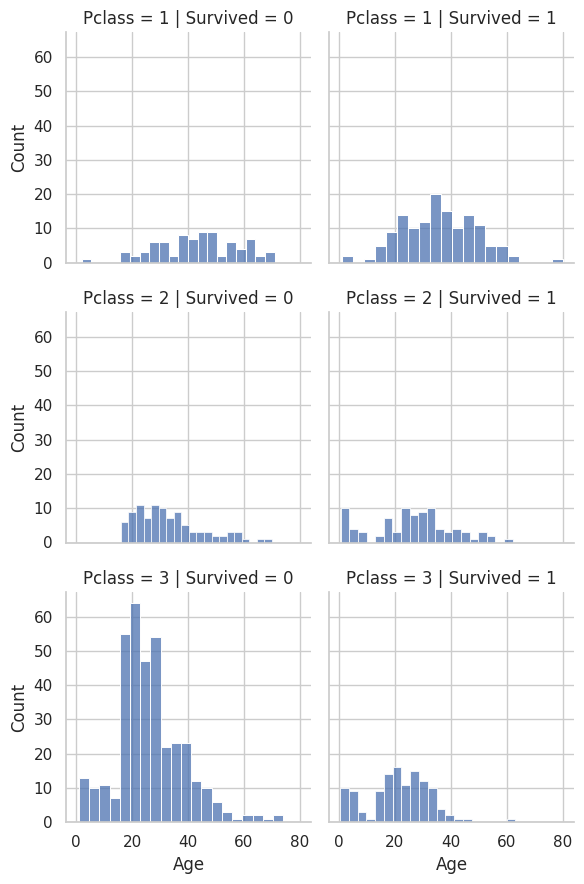

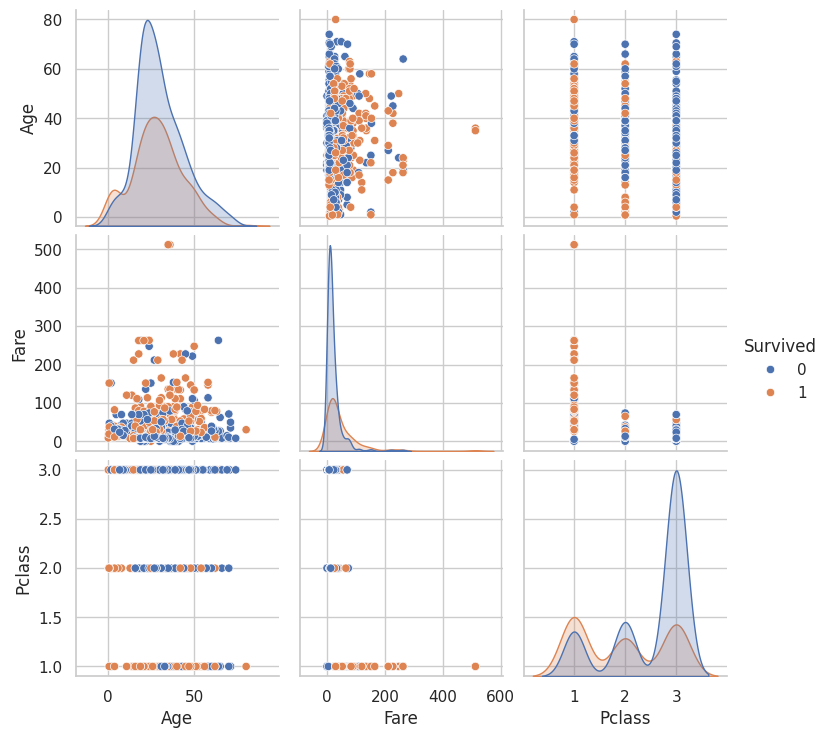

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid")
# Load Dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

df.head()
# Initial Inspection
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
# Summary Statistics
df.describe(include='all')
# Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
# Fare by Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# Survival Percentage by Class
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

# Fare Outliers - Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

# Z-Score Method
z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]
print("Number of Fare Outliers:", len(outliers))
# Facet Grid
g = sns.FacetGrid(df, row='Pclass', col='Survived', height=3)
g.map(sns.histplot, 'Age', bins=20)
plt.show()
# Pairplot
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()





